In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


In [2]:
pd.set_option('display.max_columns',35)
pd.set_option('display.max_rows',100)

In [3]:
df = pd.read_csv("C:/Users/MEENAKASHI/Downloads/HRDataset_v13.csv")

In [4]:
df.shape

(401, 35)

In [5]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


# Statistical Summary

In [6]:
df.describe(include = "object")

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,310,310,310,310,310,310,310,310,310,310,103,309,310,310,310,310,310,207
unique,310,32,28,306,2,5,3,4,6,99,93,17,5,6,21,23,4,42
top,"Fidelia, Libby",Production Technician I,MA,09/22/76,F,Single,US Citizen,No,White,1/10/2011,05/01/16,N/A - still employed,Active,Production,Michael Albert,Employee Referral,Fully Meets,1/14/2019
freq,1,136,275,2,177,137,294,281,193,14,2,196,182,208,22,31,243,18


In [7]:
df.describe(exclude = "object")

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
count,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,302.000000,310.000000,310.000000,310.000000,207.0
mean,1.199745e+09,0.396774,0.809677,0.429032,2.396774,4.606452,2.983871,0.093548,31.284806,0.332258,16.838710,6569.732258,14.579470,3.332097,3.890323,1.209677,0.0
std,1.829600e+08,0.490019,0.944702,0.495738,1.795533,1.082349,0.577124,0.291670,15.383615,0.471785,6.232272,16933.864054,8.090352,1.290590,0.910690,2.352009,0.0
min,6.020003e+08,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1013.000000,1.000000,1.030000,1.000000,0.000000,0.0
25%,1.101024e+09,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,20.000000,0.000000,18.000000,1901.250000,10.000000,2.082500,3.000000,0.000000,0.0
50%,1.203032e+09,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,24.000000,0.000000,19.000000,2132.000000,15.000000,3.470000,4.000000,0.000000,0.0
75%,1.378814e+09,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,45.315000,1.000000,20.000000,2357.000000,19.000000,4.520000,5.000000,0.000000,0.0
max,1.988300e+09,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,80.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,0.0


In [8]:
#Dropping Employee_Name and EmpID
df.drop(["Employee_Name","EmpID","GenderID"],axis = 1,inplace = True)

# Droping Missing Colum and Row 

In [9]:
df.isnull().sum()

MarriedID                      91
MaritalStatusID                91
EmpStatusID                    91
DeptID                         91
PerfScoreID                    91
FromDiversityJobFairID         91
PayRate                        91
Termd                          91
PositionID                     91
Position                       91
State                          91
Zip                            91
DOB                            91
Sex                            91
MaritalDesc                    91
CitizenDesc                    91
HispanicLatino                 91
RaceDesc                       91
DateofHire                     91
DateofTermination             298
TermReason                     92
EmploymentStatus               91
Department                     91
ManagerName                    91
ManagerID                      99
RecruitmentSource              91
PerformanceScore               91
EngagementSurvey               91
EmpSatisfaction                91
SpecialProject

In [10]:
df.shape

(401, 32)

In [11]:
#rowise missing value checking
miss = []
for i in range(0,df.shape[0]):
    miss.append(df.iloc[i].isnull().sum())
for i in range(len(miss)):
    if miss[i] >= 15:
        df.drop(index = i,inplace = True)
    else:
        pass
print(df.shape)

(310, 32)


In [12]:
#column wise cheacking
for col in df.columns:
    miss = (df[col].isnull().sum()/df.shape[0])*100
    miss = round(miss,2)
    
    if miss >= 25:
        df = df.drop(col,axis = 1)
print(df.shape)

(310, 29)


# Missing Imputation Typecasting Some Float Variable into Int

In [13]:
df_num = df.select_dtypes(exclude = "object")

df_cat = df.select_dtypes(include = "object")


In [14]:
df_num.head()

,MarriedID,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,1.0,1.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,1450.0,1.0,2.04,2.0,6.0
1,0.0,2.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,1460.0,1.0,5.00,4.0,4.0
2,0.0,0.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,2703.0,1.0,3.90,5.0,5.0
3,1.0,1.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,2170.0,1.0,3.24,3.0,4.0
4,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,2330.0,1.0,5.00,3.0,5.0


In [15]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 14 columns):
MarriedID                 310 non-null float64
MaritalStatusID           310 non-null float64
EmpStatusID               310 non-null float64
DeptID                    310 non-null float64
PerfScoreID               310 non-null float64
FromDiversityJobFairID    310 non-null float64
PayRate                   310 non-null float64
Termd                     310 non-null float64
PositionID                310 non-null float64
Zip                       310 non-null float64
ManagerID                 302 non-null float64
EngagementSurvey          310 non-null float64
EmpSatisfaction           310 non-null float64
SpecialProjectsCount      310 non-null float64
dtypes: float64(14)
memory usage: 36.3 KB


In [16]:
def unique(x):
    c = x.unique()
    return c
temp = {col:unique(df[col]) for col in df_num} #its just an unique value


In [17]:
#Here iam taking all the numerical value ,Now Extracting the discrete value

dis_col = []

for col in df_num:
    
    
    if len(temp[col]) < 35:
        
        i = 0
        
        for val  in temp[col]:
            
            if i == 1:
                dis_col.append(col)
            
            t = format(val,'.1f')
            
            
            if str(val) == t:
                i = i+1
                continue
                
            elif str(val)!= t:
                break  


In [18]:
print(dis_col) #Discrete column name
df_dis = df.loc[:,dis_col] #discrete dataframe


['MarriedID', 'MaritalStatusID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'PositionID', 'ManagerID', 'EmpSatisfaction', 'SpecialProjectsCount']


In [19]:
df_conti = df_num.drop(df_dis,axis = 1) #Continous dataset

corri = df_conti.corr(method = "pearson")

print(corri)

df_conti.head()

                   PayRate       Zip  EngagementSurvey
PayRate           1.000000  0.391945         -0.024223
Zip               0.391945  1.000000         -0.000982
EngagementSurvey -0.024223 -0.000982          1.000000


,PayRate,Zip,EngagementSurvey
0,28.50,1450.0,2.04
1,23.00,1460.0,5.00
2,29.00,2703.0,3.90
3,21.50,2170.0,3.24
4,16.56,2330.0,5.00


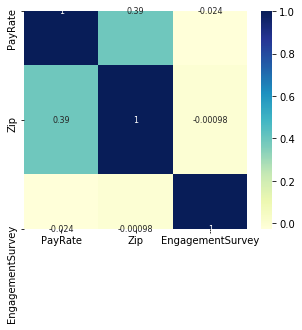

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = (5,4)
sns.heatmap(corri,annot = True,cmap='YlGnBu',annot_kws={"size": 8}, square=False)


In [21]:
def miss_impute(x):
    for col in x:
        
        if x[col].isnull().sum() > 0:
            x[col] = x[col].fillna(x[col].mode()[0])
        else:
            pass
    return x
df_dis = miss_impute(df_dis)
df_cat = miss_impute(df_cat)



C:\Users\MEENAKASHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
print(df_cat.isnull().sum())
print(df_num.isnull().sum())
print(df_dis.isnull().sum())

Position             0
State                0
DOB                  0
Sex                  0
MaritalDesc          0
CitizenDesc          0
HispanicLatino       0
RaceDesc             0
DateofHire           0
TermReason           0
EmploymentStatus     0
Department           0
ManagerName          0
RecruitmentSource    0
PerformanceScore     0
dtype: int64
MarriedID                 0
MaritalStatusID           0
EmpStatusID               0
DeptID                    0
PerfScoreID               0
FromDiversityJobFairID    0
PayRate                   0
Termd                     0
PositionID                0
Zip                       0
ManagerID                 8
EngagementSurvey          0
EmpSatisfaction           0
SpecialProjectsCount      0
dtype: int64
MarriedID                 0
MaritalStatusID           0
EmpStatusID               0
DeptID                    0
PerfScoreID               0
FromDiversityJobFairID    0
Termd                     0
PositionID                0
ManagerID    

In [23]:
for col in dis_col:
    df_dis[col] = df_dis[col].astype(int)
print(df_dis.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 11 columns):
MarriedID                 310 non-null int32
MaritalStatusID           310 non-null int32
EmpStatusID               310 non-null int32
DeptID                    310 non-null int32
PerfScoreID               310 non-null int32
FromDiversityJobFairID    310 non-null int32
Termd                     310 non-null int32
PositionID                310 non-null int32
ManagerID                 310 non-null int32
EmpSatisfaction           310 non-null int32
SpecialProjectsCount      310 non-null int32
dtypes: int32(11)
memory usage: 15.7 KB
None


In [24]:
df = df.drop(df_dis,axis = 1)
df = pd.concat([df,df_dis],axis = 1)
df = df.drop(df_cat,axis = 1)
df = pd.concat([df,df_cat],axis = 1)
df

,PayRate,Zip,EngagementSurvey,MarriedID,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,ManagerID,EmpSatisfaction,SpecialProjectsCount,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore
0,28.50,1450.0,2.04,1,1,1,1,3,1,0,1,1,2,6,Accountant I,MA,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,23.00,1460.0,5.00,0,2,1,1,3,0,0,1,1,4,4,Accountant I,MA,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,29.00,2703.0,3.90,0,0,1,1,3,0,0,1,1,5,5,Accountant I,MA,09/01/86,M,Single,US Citizen,No,White,9/29/2014,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Internet Search,Fully Meets
3,21.50,2170.0,3.24,1,1,1,1,3,0,1,2,1,3,4,Administrative Assistant,MA,09/16/85,F,Married,US Citizen,No,White,2/16/2015,N/A - still employed,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,Pay Per Click - Google,Fully Meets
4,16.56,2330.0,5.00,0,0,1,1,3,0,0,2,1,3,5,Administrative Assistant,MA,05/19/88,F,Single,US Citizen,No,White,5/1/2015,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,54.10,6033.0,1.55,1,1,3,3,3,0,0,28,7,5,8,Sr. Network Engineer,CT,01/18/52,F,Married,US Citizen,No,White,11/10/2014,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,Vendor Referral,Fully Meets
306,56.20,2169.0,4.46,1,1,3,3,3,0,0,28,7,5,6,Sr. Network Engineer,MA,04/23/86,M,Married,US Citizen,No,White,11/10/2014,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,Employee Referral,Fully Meets
307,53.80,1545.0,3.27,1,1,2,3,3,0,0,28,7,4,5,Sr. Network Engineer,MA,02/09/83,M,Married,US Citizen,No,Asian,6/30/2016,N/A - Has not started yet,Future Start,IT/IS,Peter Monroe,On-campus Recruiting,Fully Meets
308,53.00,6278.0,5.00,0,0,1,3,3,0,0,28,7,3,4,Sr. Network Engineer,CT,09/09/65,M,Single,US Citizen,No,White,11/10/2014,N/A - still employed,Active,IT/IS,Peter Monroe,Employee Referral,Fully Meets


In [25]:
#Now the float value of discrete value are changed in int type

In [26]:
df_dis = df.select_dtypes(include = "int32")

temp = {col:unique(df[col]) for col in df_dis} #its just an unique value
temp


{'MarriedID': array([1, 0], dtype=int64),
 'MaritalStatusID': array([1, 2, 0, 4, 3], dtype=int64),
 'EmpStatusID': array([1, 5, 4, 2, 3], dtype=int64),
 'DeptID': array([1, 6, 3, 5, 2, 4], dtype=int64),
 'PerfScoreID': array([3, 1, 4, 2], dtype=int64),
 'FromDiversityJobFairID': array([1, 0], dtype=int64),
 'Termd': array([0, 1], dtype=int64),
 'PositionID': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 29, 28], dtype=int64),
 'ManagerID': array([ 1, 17, 21, 13,  5,  2,  4,  6,  7,  9, 11, 12, 14, 16, 18, 19, 20,
        22, 39, 30, 15, 10,  3], dtype=int64),
 'EmpSatisfaction': array([2, 4, 5, 3, 1], dtype=int64),
 'SpecialProjectsCount': array([6, 4, 5, 0, 7, 3, 2, 8], dtype=int64)}

In Discrete Some of the Variable are in the form of Object so I'm converting Int into Object

In [27]:
int_obj = ['MarriedID','Termd','FromDiversityJobFairID']

for col in int_obj:
    df[col] = df[col].astype(object)
    
#When making dummy variable,columns name are varry not properly read so internally observation name where chaning now

In [28]:
married=pd.get_dummies(df["MarriedID"])
married = married.rename(columns = {0:"Not Married",1:"Married"})
df.drop(["MarriedID"],axis = 1,inplace =True) 


jobfair =pd.get_dummies(df["FromDiversityJobFairID"]) 
jobfair = jobfair.rename(columns = {0:"Not_from_jobfair",1:"from_job_fair"})
df.drop(["FromDiversityJobFairID"],axis = 1,inplace =True)


term = pd.get_dummies(df["Termd"])
term = term.rename(columns = {0:"Not_termd",1:"Termd"})
df.drop(["Termd"],axis = 1,inplace =True)


df = pd.concat([df,married,term,jobfair],axis = 1)


In [29]:
df = df.drop(["DOB","DateofHire"],axis = 1)

In [30]:
df.head()

,PayRate,Zip,EngagementSurvey,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,PositionID,ManagerID,EmpSatisfaction,SpecialProjectsCount,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,Not Married,Married,Not_termd,Termd,Not_from_jobfair,from_job_fair
0,28.50,1450.0,2.04,1,1,1,3,1,1,2,6,Accountant I,MA,F,Married,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,0,1,1,0,0,1
1,23.00,1460.0,5.00,2,1,1,3,1,1,4,4,Accountant I,MA,M,Divorced,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,1,0,1,0,1,0
2,29.00,2703.0,3.90,0,1,1,3,1,1,5,5,Accountant I,MA,M,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Internet Search,Fully Meets,1,0,1,0,1,0
3,21.50,2170.0,3.24,1,1,1,3,2,1,3,4,Administrative Assistant,MA,F,Married,US Citizen,No,White,N/A - still employed,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,Pay Per Click - Google,Fully Meets,0,1,0,1,1,0
4,16.56,2330.0,5.00,0,1,1,3,2,1,3,5,Administrative Assistant,MA,F,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,1,0,1,0,1,0


Encoding

In [31]:
df_cat = df.select_dtypes(include = "object")
cat_uni ={col :unique(df[col]) for col in df_cat}

In [32]:
cat_uni

{'Position': array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
        'BI Developer', 'BI Director', 'CIO', 'Data Architect',
        'Database Administrator', 'Data Analyst', 'Data Analyst ',
        'Director of Operations', 'Director of Sales', 'IT Director',
        'IT Manager - DB', 'IT Manager - Infra', 'IT Manager - Support',
        'IT Support', 'Network Engineer', 'President & CEO',
        'Production Manager', 'Production Technician I',
        'Production Technician II', 'Sales Manager', 'Senior BI Developer',
        'Shared Services Manager', 'Software Engineer',
        'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
        'Enterprise Architect', 'Principal Data Architect',
        'Sr. Network Engineer'], dtype=object),
 'State': array(['MA', 'VA', 'VT', 'WA', 'NH', 'NY', 'OH', 'ID', 'TN', 'UT', 'AL',
        'NC', 'MT', 'AZ', 'ME', 'CA', 'CT', 'IN', 'NV', 'CO', 'TX', 'GA',
        'FL', 'KY', 'ND', 'OR', 'RI', 'PA'], dtype=objec

[Text(0, 0, 'Accountant I'),
 Text(0, 0, 'Administrative Assistant'),
 Text(0, 0, 'Area Sales Manager'),
 Text(0, 0, 'BI Developer'),
 Text(0, 0, 'BI Director'),
 Text(0, 0, 'CIO'),
 Text(0, 0, 'Data Architect'),
 Text(0, 0, 'Database Administrator'),
 Text(0, 0, 'Data Analyst'),
 Text(0, 0, 'Data Analyst '),
 Text(0, 0, 'Director of Operations'),
 Text(0, 0, 'Director of Sales'),
 Text(0, 0, 'IT Director'),
 Text(0, 0, 'IT Manager - DB'),
 Text(0, 0, 'IT Manager - Infra'),
 Text(0, 0, 'IT Manager - Support'),
 Text(0, 0, 'IT Support'),
 Text(0, 0, 'Network Engineer'),
 Text(0, 0, 'President & CEO'),
 Text(0, 0, 'Production Manager'),
 Text(0, 0, 'Production Technician I'),
 Text(0, 0, 'Production Technician II'),
 Text(0, 0, 'Sales Manager'),
 Text(0, 0, 'Senior BI Developer'),
 Text(0, 0, 'Shared Services Manager'),
 Text(0, 0, 'Software Engineer'),
 Text(0, 0, 'Software Engineering Manager'),
 Text(0, 0, 'Sr. Accountant'),
 Text(0, 0, 'Sr. DBA'),
 Text(0, 0, 'Enterprise Architect'),

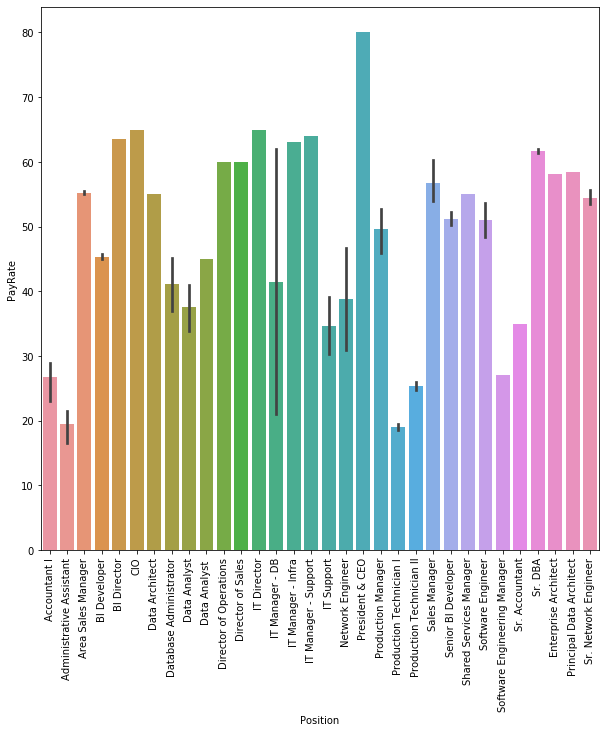

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
chart = sns.barplot(df["Position"],df["PayRate"])
chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)

In [34]:
val_coun = df.groupby("Position")["PayRate"].median() #Grouping Position and finding positional average according to that I'm Encoded

val_coun = val_coun.sort_values(axis = 0,ascending = True) #Sorted poisitional average with the object

dicti = {}
l = len(val_coun.index)
for i,val in enumerate(val_coun.index):
    dicti[val] = i+1
df["Position"] = df["Position"].map(dicti)

In [35]:
state = df.groupby("State")["PayRate"].median()
state =state.sort_values(axis = 0,ascending= True)
state_dict = {}
for i,val in enumerate(state.index):
    state_dict[val] = i+1
df["State"] = df["State"].map(state_dict)

In [36]:
df.groupby("MaritalDesc")["PayRate"].median()

df["MaritalDesc"] = df["MaritalDesc"].map({"Separated":5,"Married":4,"Single":3,"Widowed":2,"Divorced":1})

df = df.drop(["ManagerName"],axis = 1)

In [37]:
city = df.groupby("CitizenDesc")["PayRate"].median()
city_dict = {"Eligible NonCitizen":3,"Non-Citizen":2,"US Citizen":1}
df["CitizenDesc"] = df["CitizenDesc"].map(city_dict)

In [38]:
df.groupby("RaceDesc")["PayRate"].median()
df["RaceDesc"] = df["RaceDesc"].map({"Hispanic":6, "Black or African American":5, "American Indian or Alaska Native":4,"White":3,"Asian":2,"Two or more races":1})

In [39]:
term_re = df.groupby("TermReason")["PayRate"].median()
term_re = term_re.sort_values(axis = 0,ascending = True)

dict_term = {}
for i,val in enumerate(term_re.index):
    dict_term[val] = i+1
    
df["TermReason"] = df["TermReason"].map(dict_term)

In [40]:
df.groupby("EmploymentStatus")["PayRate"].median()
df["EmploymentStatus"] = df["EmploymentStatus"].map({"Active":5,"Future Start":4,"Leave of Absence":3,"Voluntarily Terminated":2,"Terminated for Cause":1})

In [41]:
depart = df.groupby("Department")["PayRate"].median()
depart = depart.sort_values(axis = 0,ascending = True)
depart_dict ={}
for i,val in enumerate(depart.index):
    depart_dict[val] = i+1
df["Department"] = df["Department"].map(depart_dict)

In [42]:
recru = df.groupby("RecruitmentSource")["PayRate"].median()
recru = recru.sort_values(axis = 0,ascending = True)
recru_dict = {}
for i ,val in enumerate(recru.index):
    recru_dict[val] = i+1
df["RecruitmentSource"] = df["RecruitmentSource"].map(recru_dict)


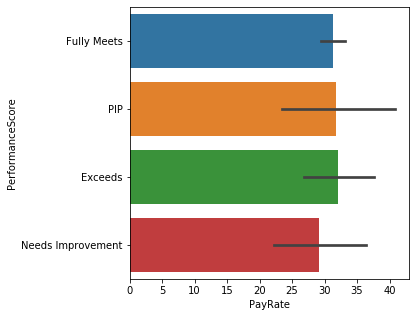

In [43]:
rcParams['figure.figsize'] = 5,5
sns.barplot(df["PayRate"],df["PerformanceScore"])

In [44]:
df.groupby("PerformanceScore")["PayRate"].median()
perf_dict = {"Exceeds":4,"PIP":3,"Fully Meets":2,"Needs Improvement":1}
df["PerformanceScore"] = df["PerformanceScore"].map(perf_dict)

In [45]:
sex = pd.get_dummies(df["Sex"])
df.drop(["Sex"],axis = 1,inplace = True)
df = pd.concat([df,sex],axis = 1)


In [46]:
df["HispanicLatino"] = df["HispanicLatino"].map({'yes':'HispanicLAtino_Yes','no':'HispanicLAtino_No','Yes':'HispanicLAtino_Yes','No':'HispanicLAtino_No'})
HispanicLat = pd.get_dummies(df["HispanicLatino"])
df = pd.concat([df,HispanicLat],axis = 1)
df.drop(["HispanicLatino"],axis = 1,inplace =True)


In [47]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df)
# scaled = scaler.transform(df)


In [48]:
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import kstest


In [49]:
print("Anderson Darling Test for Acyutal data {}" .format(anderson(df["PayRate"])))
print()
print("shapiro Test for Actual Data{}".format(shapiro(df["PayRate"])))
print()
print("KS Test for Actual Data{}".format(kstest(df["PayRate"],'norm')))

Anderson Darling Test for Acyutal data AndersonResult(statistic=21.909140381406587, critical_values=array([0.569, 0.648, 0.777, 0.907, 1.078]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

shapiro Test for Actual Data(0.8354495763778687, 1.713859830258627e-17)

KS Test for Actual DataKstestResult(statistic=1.0, pvalue=0.0)


0.8371906088322965


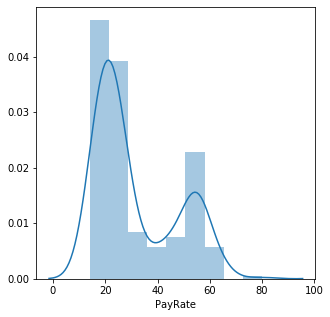

In [50]:
target = df["PayRate"]

print(df["PayRate"].skew())

sns.distplot(df["PayRate"])

Log Transformation

0.46983006888428575


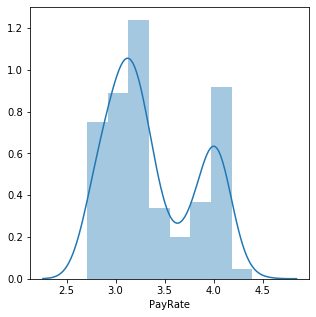

In [51]:
log_traget = np.log1p(df["PayRate"])

print(log_traget.skew())
      
sns.distplot(log_traget)

In [52]:
print("Anderson Darling Test for Loged data \n\n\t {} " .format(anderson(log_traget)))
print()
print("shapiro Test for Loged Data \n\t{}".format(shapiro(log_traget)))
print()
print("KS Test for loged Data \n\t{}".format(kstest(log_traget,'norm')))

Anderson Darling Test for Loged data 

	 AndersonResult(statistic=12.437747042657122, critical_values=array([0.569, 0.648, 0.777, 0.907, 1.078]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

shapiro Test for Loged Data 
	(0.8985098600387573, 1.4951784927351441e-13)

KS Test for loged Data 
	KstestResult(statistic=0.9966160107920665, pvalue=0.0)


0.13267825084082796


(array([20., 29., 23., 61., 47., 27.,  8., 19., 64., 12.]),
 array([1.23003399, 1.24719366, 1.26435333, 1.281513  , 1.29867267,
        1.31583234, 1.33299201, 1.35015168, 1.36731135, 1.38447101,
        1.40163068]),
 <a list of 10 Patch objects>)

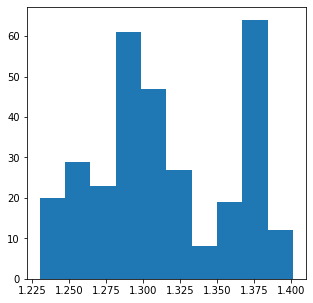

In [53]:
from scipy.stats import boxcox

boxcox_target,lambda_target =boxcox(df["PayRate"])

print(skew(boxcox_target))

plt.hist(boxcox_target)

In [54]:
print("Anderson Darling Test for BoxCox data \n\n\t {} " .format(anderson(boxcox_target)))
print()
print("shapiro Test for BoxCox Data \n\t{}".format(shapiro(boxcox_target)))
print()
print("KS Test for BoxCox Data \n\t{}".format(kstest(boxcox_target,'norm')))

Anderson Darling Test for BoxCox data 

	 AndersonResult(statistic=7.446098604137603, critical_values=array([0.569, 0.648, 0.777, 0.907, 1.078]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

shapiro Test for BoxCox Data 
	(0.9299315810203552, 6.645961558859881e-11)

KS Test for BoxCox Data 
	KstestResult(statistic=0.8906578119392676, pvalue=2.6783883428206353e-298)


0.13912568578247858


(array([20., 29., 23., 61., 47., 27.,  8., 19., 64., 12.]),
 array([1.18278095, 1.19632331, 1.20986566, 1.22340802, 1.23695037,
        1.25049273, 1.26403508, 1.27757744, 1.29111979, 1.30466215,
        1.3182045 ]),
 <a list of 10 Patch objects>)

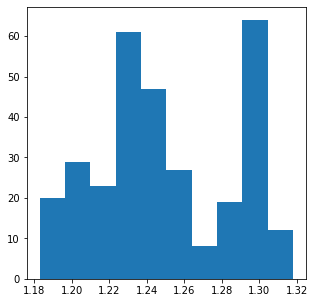

In [55]:
from scipy.stats import yeojohnson

yeo_target,yeo_lambda = yeojohnson(df["PayRate"])


print(skew(yeo_target))

plt.hist(yeo_target)

In [56]:
print("Anderson Darling Test for Yeo data \n\n\t {} " .format(anderson(yeo_target)))
print()
print("shapiro Test for Yeo Data \n\t{}".format(shapiro(yeo_target)))
print()
print("KS Test for Yeo Data \n\t{}".format(kstest(yeo_target,'norm')))

Anderson Darling Test for Yeo data 

	 AndersonResult(statistic=7.542622662843826, critical_values=array([0.569, 0.648, 0.777, 0.907, 1.078]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

shapiro Test for Yeo Data 
	(0.9291613698005676, 5.6111261470537244e-11)

KS Test for Yeo Data 
	KstestResult(statistic=0.8815520141685456, pvalue=1.927696091670893e-287)


In [57]:
#BoxCox is Better than other transformation fot this dataset

In [58]:
df["PayRate"] = boxcox_target

In [59]:
q1 = df["PayRate"].quantile(0.25)
q3 = df["PayRate"].quantile(0.75)
iqr = q3 - q1


out = df[ ((df["PayRate"] < (q1-1.5*iqr)) | (df["PayRate"] > (q3 + 1.5*iqr))) ]



df_out = df[~((df["PayRate"] < (q1-1.5*iqr)) | (df["PayRate"] > (q3 + 1.5*iqr))) ] 
    
len(df),len(df_out)
len(df)-len(df_out)

0

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_out)
scaled = scaler.transform(df_out)
scaled_df = pd.DataFrame(data = scaled,columns = df.columns)
scaled_df

,PayRate,Zip,EngagementSurvey,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,PositionID,ManagerID,EmpSatisfaction,SpecialProjectsCount,Position,State,MaritalDesc,CitizenDesc,RaceDesc,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,Not Married,Married,Not_termd,Termd,Not_from_jobfair,from_job_fair,F,M,HispanicLAtino_No,HispanicLAtino_Yes
0,0.193940,-0.302826,-1.002786,0.201789,-0.779174,-3.337447,0.027992,-2.545511,-1.707303,-2.079060,2.039987,-0.224617,-0.281229,0.785655,-0.226101,1.670786,0.563795,0.794174,0.096066,-0.882604,-0.302428,-1.233015,1.233015,0.705397,-0.705397,-3.112821,3.112821,0.866840,-0.866840,0.315104,-0.315104
1,-0.320398,-0.302234,1.294446,1.262035,-0.779174,-3.337447,0.027992,-2.545511,-1.707303,0.120628,1.188275,-0.224617,-0.281229,-2.377372,-0.226101,1.670786,0.563795,0.794174,0.096066,1.718225,-0.302428,0.811020,-0.811020,0.705397,-0.705397,0.321252,-0.321252,-1.153615,1.153615,0.315104,-0.315104
2,0.232480,-0.228712,0.440745,-0.858457,-0.779174,-3.337447,0.027992,-2.545511,-1.707303,1.220472,1.614131,-0.224617,-0.281229,-0.268687,-0.226101,-0.179013,0.563795,0.794174,0.096066,0.677893,-0.302428,0.811020,-0.811020,0.705397,-0.705397,0.321252,-0.321252,-1.153615,1.153615,0.315104,-0.315104
3,-0.498227,-0.260239,-0.071476,0.201789,-0.779174,-3.337447,0.027992,-2.384797,-1.707303,-0.979216,1.188275,-0.609319,-0.281229,0.785655,-0.226101,-0.179013,0.563795,-1.918706,0.096066,1.198059,-0.302428,-1.233015,1.233015,-1.417642,1.417642,0.321252,-0.321252,0.866840,-0.866840,0.315104,-0.315104
4,-1.268452,-0.250775,1.294446,-0.858457,-0.779174,-3.337447,0.027992,-2.384797,-1.707303,-0.979216,1.614131,-0.609319,-0.281229,-0.268687,-0.226101,-0.179013,0.563795,0.794174,0.096066,1.718225,-0.302428,0.811020,-0.811020,0.705397,-0.705397,0.321252,-0.321252,0.866840,-0.866840,0.315104,-0.315104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,1.353118,-0.031747,-1.383071,0.201789,0.336502,-1.486627,0.027992,1.793782,-0.954973,1.220472,2.891699,1.314193,-0.063276,0.785655,-0.226101,-0.179013,0.563795,-0.562266,0.822420,1.371448,-0.302428,-1.233015,1.233015,0.705397,-0.705397,0.321252,-0.321252,0.866840,-0.866840,0.315104,-0.315104
306,1.407432,-0.260298,0.875357,0.201789,0.336502,-1.486627,0.027992,1.793782,-0.954973,1.220472,2.039987,1.314193,-0.281229,0.785655,-0.226101,-0.179013,0.563795,-0.562266,0.822420,1.024671,-0.302428,-1.233015,1.233015,0.705397,-0.705397,0.321252,-0.321252,-1.153615,1.153615,0.315104,-0.315104
307,1.345070,-0.297207,-0.048193,0.201789,-0.221336,-1.486627,0.027992,1.793782,-0.954973,0.120628,1.614131,1.314193,-0.281229,0.785655,-0.226101,-1.103912,0.056461,0.115954,0.822420,-1.229381,-0.302428,-1.233015,1.233015,0.705397,-0.705397,0.321252,-0.321252,-1.153615,1.153615,0.315104,-0.315104
308,1.323235,-0.017256,1.294446,-0.858457,-0.779174,-1.486627,0.027992,1.793782,-0.954973,-0.979216,1.188275,1.314193,-0.063276,-0.268687,-0.226101,-0.179013,0.563795,0.794174,0.822420,1.024671,-0.302428,0.811020,-0.811020,0.705397,-0.705397,0.321252,-0.321252,-1.153615,1.153615,0.315104,-0.315104


In [61]:
feature = scaled_df.drop("PayRate",axis = 1)
response = scaled_df["PayRate"]

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature,response,test_size = 0.3,random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(217, 30)
(217,)
(93, 30)
(93,)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

mod = LinearRegression()
mod.fit(X_train,y_train)
y_pred = mod.predict(X_test)

print("Root Mean Squared Error:" ,np.sqrt(mean_squared_error(y_pred,y_test)))


Root Mean Squared Error: 0.5183611292728656


In [64]:
import statsmodels.api as lm
mod1 = lm.OLS(y_train,X_train).fit()
ols_pred = mod1.predict(X_test)
print("Root Mean Squared Error:" ,np.sqrt(mean_squared_error(ols_pred,y_test)))


Root Mean Squared Error: 0.5178598132649835


In [65]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                PayRate   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              32.73
Date:                Sat, 16 May 2020   Prob (F-statistic):                    5.03e-56
Time:                        14:39:56   Log-Likelihood:                         -122.97
No. Observations:                 217   AIC:                                      295.9
Df Residuals:                     192   BIC:                                      380.4
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Zip                     -0.0274      0.060     -0.457      0.648      -0.146       0.091
EngagementSurvey        -0.0279      0.033     -0.856      0.393      -0.092       0.036
MaritalStatusID          0.0088      0.033      0.268      0.789      -0.056       0.074
EmpStatusID              0.2376      0.133      1.786      0.076      -0.025       0.500
DeptID                  -0.0322      0.062     -0.517      0.606      -0.155       0.091
PerfScoreID             -0.0278      0.040     -0.700      0.485      -0.106       0.050
PositionID               0.0364      0.048      0.760      0.448      -0.058       0.131
ManagerID               -0.0207      0.046     -0.455      0.649      -0.111       0.069
EmpSatisfaction          0.0437      0.036      1.221      0.224      -0.027       0.114
SpecialProjectsCount     0.0689      0.084      0.822      0.412      -0.096       0.234
Position                 0.8056      0.063     12.768      0.000       0.681       0.930
State                   -0.0433      0.064     -0.676      0.500      -0.169       0.083
MaritalDesc              0.0871      0.047      1.839      0.067      -0.006       0.181
CitizenDesc              0.0244      0.035      0.691      0.491      -0.045       0.094
RaceDesc                 0.0522      0.034      1.544      0.124      -0.014       0.119
TermReason               0.0311      0.055      0.561      0.575      -0.078       0.140
EmploymentStatus         0.0898      0.116      0.774      0.440      -0.139       0.319
Department               0.1396      0.098      1.424      0.156      -0.054       0.333
RecruitmentSource        0.0383      0.037      1.038      0.300      -0.034       0.111
PerformanceScore         0.0501      0.039      1.297      0.196      -0.026       0.126
Not Married              0.0043      0.023      0.189      0.850      -0.040       0.049
Married                 -0.0043      0.023     -0.189      0.850      -0.049       0.040
Not_termd                0.0417      0.059      0.705      0.482      -0.075       0.158
Termd                   -0.0417      0.059     -0.705      0.482      -0.158       0.075
Not_from_jobfair         0.0492      0.019      2.556      0.011       0.011       0.087
from_job_fair           -0.0492      0.019     -2.556      0.011      -0.087      -0.011
F                       -0.0030      0.016     -0.186      0.853      -0.035       0.029
M                        0.0030      0.016      0.186      0.853      -0.029       0.035
HispanicLAtino_No       -0.0115      0.017     -0.665      0.507      -0.046       0.023
HispanicLAtino_Yes       0.0115      0.017      0.665      0.507      -0.023       0.046
===============================================

In [66]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
mse = cross_val_score(lin_reg,X_train,y_train, scoring = 'neg_mean_squared_error',cv = 10)
mean_mse = np.mean(mse)
mean_mse


-0.24271578484748738

# Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
rid_reg = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv = 10)
rid_reg.fit(X_train,y_train)

C:\Users\MEENAKASHI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [68]:
print(rid_reg.best_score_)
print(rid_reg.best_params_)

-0.233088973723224
{'alpha': 10}


# Lasso Regression

In [69]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
las_reg = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv = 10)
las_reg.fit(X_train,y_train)

C:\Users\MEENAKASHI\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8915526038148265, tolerance: 0.01927192139598337
  positive)
C:\Users\MEENAKASHI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [70]:
print(las_reg.best_score_)
print(las_reg.best_params_)

-0.22591090748149542
{'alpha': 0.01}


In [71]:
pred_rid = rid_reg.predict(X_test)
pred_las = las_reg.predict(X_test)

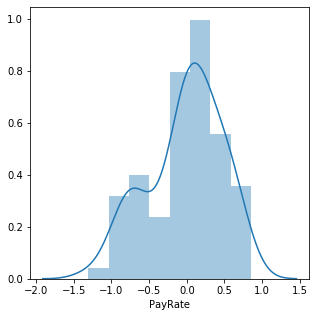

In [72]:
sns.distplot(y_test-pred_rid)

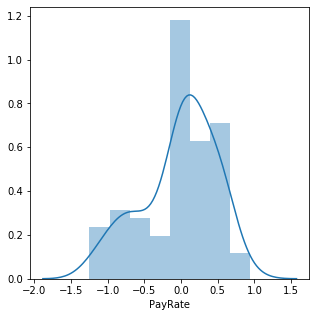

In [73]:
sns.distplot(y_test-pred_las)